In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

def generate_random_data(n=1000):
    epsilon = np.random.uniform(-.3, .3, n)
    x = np.random.uniform(0.0, 1.0, n)
    y = np.sin(2*np.pi*x) + epsilon
    return (x, y)

def init_theta(n_dim=2):
    return np.random.uniform(-.5, .5, n_dim)

def create_feature_vectors(x, n_dim=2):
    X = x ** 0
    for m in range(1, n_dim):
        X = np.column_stack((X, x ** m))
    return X

In [2]:
def hypothesis_(x, theta):
    s = 0.
    for i in range(len(x)):
        s += x[i] * theta[i]
    return s

In [3]:
def hypothesis(X, theta):
    return np.dot(theta, X.T)

In [4]:
def cost_(x, y, theta):
    return .5 * (hypothesis_(x, theta) - y) ** 2

In [5]:
def cost(X, y, theta):
    error = hypothesis(X, theta) - y
    squared_error = np.dot(error.T, error)
    return .5 * squared_error

In [6]:
def nabla_theta_cost(X, y, theta):
    A = np.dot(X.T, X)
    B = np.dot(A, theta)
    C = np.dot(X.T, y)
    return B - C

In [7]:
def sgd(x, y, poly_degree=5, n_iter=500000, learning_rate = 0.001, min_error_delta = 0.0000125):
    # create feature vecotrs for the polynominal of degree poly_degree
    X = create_feature_vectors(x, poly_degree)
    # init the respective theta with random uniform numbers
    theta = init_theta(poly_degree)
    
    errors = []
    early_stopped = False
    for i in range(0, n_iter):
        old_error = cost(X, y, theta)
        ntc = nabla_theta_cost(X, y, theta)
        theta -= learning_rate * ntc
        new_error = cost(X, y, theta)
        errors.append(new_error)
        if old_error - new_error < min_error_delta:
            print("Early stopping afer %d iterations" % (i))
            early_stopped = True
            break
    
    if not early_stopped:
        print("Stopping after %d iterations. Error has not converged yet!" % (n_iter))
    
    print("Min. error %f" % (np.min(errors)))
    print("Max. error %f" % (np.max(errors)))
    return theta, errors


In [8]:
def plot_results(x, y, theta, errors):
    import os
    fig, ax = plt.subplots()
    title = 'Randomly Generated Data with fitted %i-degree-polynominal' % (len(theta))
    fig.suptitle(title)

    # plot original data
    ax.scatter(x, y, marker='.',linewidths=1, label='randomly generated data point')

    # plot hypothesis
    x_ = np.linspace(0.0, 1.0, 50)
    X_ = create_feature_vectors(x_, len(theta))
    ax.plot(x_, hypothesis(X_, theta), 'r', linewidth=2, label='fitted  %i-degree-polynominal' % (len(theta)))
    ax.legend()
    ax.set(xlabel='x', ylabel='y')
    plt.savefig(os.getcwd() + '/'+ title.lower().replace(' ', '_') + '.png')

    # plot error
    fig, ax = plt.subplots()
    title = 'Error over iterations of SGD'
    iterations = list(range(len(errors)))
    ax.plot(iterations, errors)
    ax.set(xlabel='n_iteration', ylabel='Error')
    ax.set_title(title)
    plt.savefig(os.getcwd() + '/'+ title.lower().replace(' ', '_') + '.png')


In [9]:
x, y = generate_random_data(1000)
theta, errors = sgd(x, y, poly_degree = 9, learning_rate=0.001)

Early stopping afer 32799 iterations
Min. error 14.977106
Max. error 232.100263


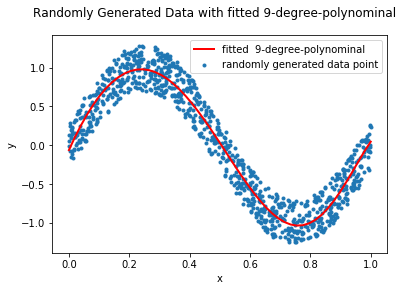

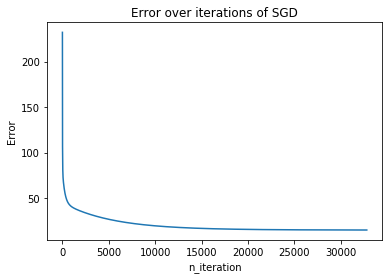

In [10]:
plot_results(x,y,theta,errors)